# Loan Data From Prosper: what happens behind the scene?
## by Mahmou Yassin

## Investigation Overview

> This presentation is centered around how the characteristics of the loan and the customer influence `BorrowerAPR` and `LoanOriginalAmount`
## Dataset Overview

> Prosper is a peer-to-peer lender that provides personal loans to borrowers with fair or good credit. In This Journey we will explore `Loan data from prosper` dataset which includes`113937` observations and `81` variable including loan status, borrowerAPR, borrower rate , term and more and in this analysis I chose to work with loans originated after July 2009 because some of the crucial features of the analysis doesn't exist before that date so the size after periliminary wrangling is `83161` observations and `9` variables

### Definitions of the variables used in the Presentation:
1. BorrowerAPR: The Borrower's Annual Percentage Rate (APR) for the loan.
2. Term: The length of the loan expressed in years
3. LoanOriginalAmount: The origination amount of the loan.
4. ProsperScore: A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009.
5. ProsperRating(Alpha):The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009. with AA being the best
6. EmploymentStatus: The employment status of the borrower at the time they posted the listing.
7. ListingCreationDate: The date the listing was created.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the subset chosen for analysis from the original dataset into a pandas dataframe
loan_final = pd.read_csv('loan_final.csv')

### Creating helper functions

In [3]:
# building a function that will help converting some variables to category data type
def to_category(df, column, categories, ordered=False):
    '''This function converts a variable to category data type
    df: is the dataframe that have the variable
    column: the name of the variable
    categories: list of the categories of the variable
    ordered: whether or not the categories are ordered(pool)'''
    category_type = pd.api.types.CategoricalDtype(ordered=ordered, categories=categories)
    df[column] = df[column].astype(category_type)

In [4]:
def heat_map(df, x, y, x_inc, y_inc,x_max=None, y_max=None,  cmap='viridis_r', cmin=0.5, 
             color_bar=False, x_lim=None, title=False):
    '''This function will help creating heat maps quickly
    df: pd.dataframe
    x: variable name (string)
    y: variable name (string)
    x_inc: how the array for bins_x will be incremented (int/float)
    y_inc: how the array for bins_y will be incremented (int/float)
    x_max: the limit of x (int/float)
    y_max: the limit of y (int/float)
    cmap: color palette (string)
    cmin: float
    color_bar: whether or not you want a color bar (bool)
    title: whether or not you want auto generated title (bool)
    '''
    if x_max == None:
        bins_x = np.arange(0, df[x].max()+x_inc, x_inc)
    else:
        bins_x = np.arange(0, x_max+x_inc, x_inc)
    if y_max == None:
        bins_y = np.arange(0, df[y].max()+y_inc, y_inc)
    else:
        bins_y = np.arange(0, y_max+y_inc, y_inc)
    plt.hist2d(data=df, x=x, y=y , bins=[bins_x, bins_y], cmap=cmap, cmin=cmin)
    if color_bar == True:
        plt.colorbar()
    plt.xlabel(x)
    plt.ylabel(y)
    if title == True:
        plt.title('{} VS {}'.format(y, x));
    

### Changing the data types

In [5]:
# first I will convert ListingCreationDate to datetime dtype 
loan_final.ListingCreationDate = pd.to_datetime(loan_final.ListingCreationDate)
# changing the dtype of ProsperScore to ordered Categorical dtype
loan_final.ProsperScore = loan_final.ProsperScore.astype(int).astype(str)
scores = np.sort(loan_final.ProsperScore.unique().astype(int)).astype(str)
to_category(loan_final, 'ProsperScore', scores, ordered=True)
# changing the dtype of ProsperRating (Alpha) to ordered categorical dtype
ratings = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']
to_category(loan_final, 'ProsperRating (Alpha)', ratings, ordered=True)
# changing the dtype of the Term variable to ordered categorical dtype
terms = ['one_year', 'three_years', 'five_years']
to_category(loan_final, 'Term', terms, ordered=True)

In [6]:
# checking the succuss of changing the data types
loan_final.dtypes

ListingCreationDate      datetime64[ns]
LoanOriginalAmount                int64
Term                           category
ProsperRating (Alpha)          category
ProsperScore                   category
EmploymentStatus                 object
StatedMonthlyIncome             float64
DebtToIncomeRatio               float64
BorrowerAPR                     float64
dtype: object

## Distibution of  the `BorrowerAPR` variable

> the plot is close to be normally ditributed except a very big peak around 0.35 with a few points with more than 0.4 APR

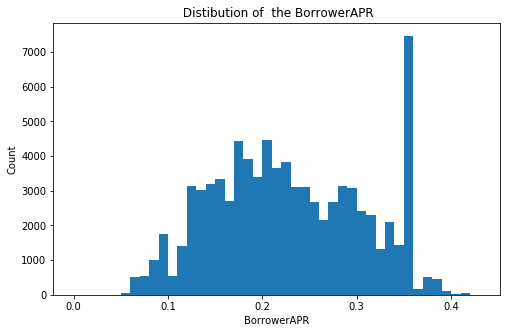

In [7]:
# viewing the distribution of the BorrowerAPR column
plt.figure(figsize=(8, 5))
bins = np.arange(0, loan_final.BorrowerAPR.max()+0.01, 0.01)
sns.distplot(loan_final.BorrowerAPR, kde=False, bins=bins, hist_kws={'alpha': 1});
plt.title(' Distibution of  the BorrowerAPR')
plt.ylabel('Count');

## Distibution of the `LoanOriginalAmount`variable
> The distribution is right skewed with large spikes at 5k, 10k, 15k and small spikes at 25k and 20k which suggests 
that loan amount is usually a multiple of five.

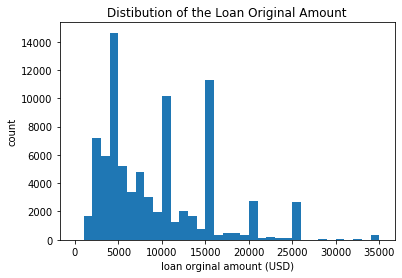

In [8]:
bins = np.arange(0, loan_final.LoanOriginalAmount.max()+1000, 1000 )
plt.hist(loan_final.LoanOriginalAmount, bins=bins);
plt.title( 'Distibution of the Loan Original Amount')
plt.xlabel('loan orginal amount (USD)');
plt.ylabel('count');

## Distribution of the `Term` variable

> Most loans Term is a three year term and few loans with one year term

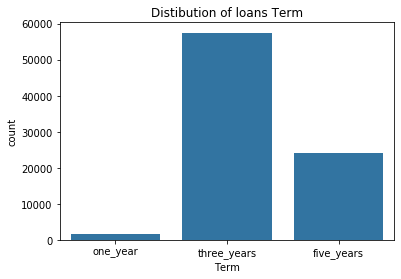

In [9]:
base_color = sns.color_palette()[0]
sns.countplot(data=loan_final, x='Term', color=base_color);
plt.title('Distibution of loans Term');

## Distribution of the `ProsperRating (Alpha)` variable
> The distribution is normally ditributed with most ratings is from A to E with few ratings in AA and HR


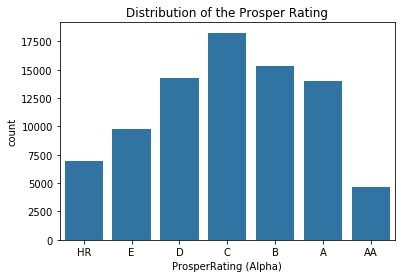

In [10]:
sns.countplot(data=loan_final, x='ProsperRating (Alpha)', color=base_color);
plt.title('Distribution of the Prosper Rating');

## Distribution of the `ProsperScore` variable
> The distibution is almost normal with a few data points with score of one

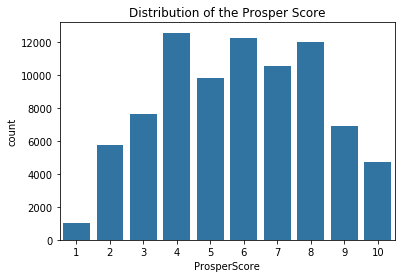

In [11]:
sns.countplot(data=loan_final, x='ProsperScore', color=base_color);
plt.title('Distribution of the Prosper Score');

## Distribution of the `EmploymentStatus` variable
> About 80 % of the customers is Employed

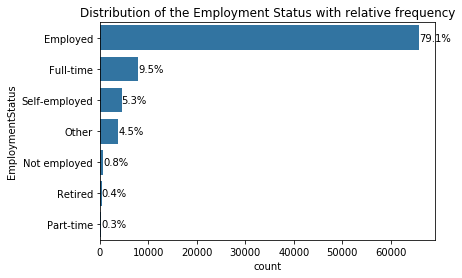

In [12]:
n_loans = loan_final.shape[0]
status_count = loan_final.EmploymentStatus.value_counts()
status_order = status_count.index
sns.countplot(data=loan_final, y='EmploymentStatus', color=base_color, order=status_order);
for i in range(status_count.shape[0]):
    count = status_count[i]
    pct_string = '{:0.1f}%'.format(100*count/n_loans)
    plt.text(count+1, i, pct_string, va='center', color='k');
plt.title('Distribution of the Employment Status with relative frequency');

##  How `BorrowerAPR` changed over time
> It looks that `BorrowerAPr` is decreasing in general over time but with a closer look  BorrowerAPr mean has been increasing from 2009 to 2011 with a significant decrease in march 2011 and has been decreasing over time since 2012

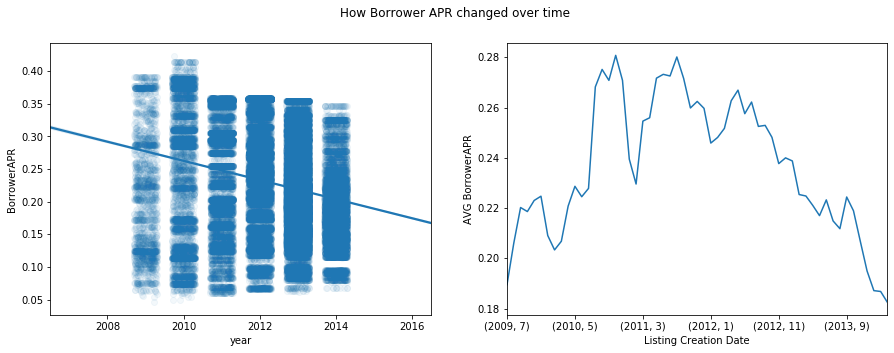

In [13]:
plt.figure(figsize=(15, 5))
plt.suptitle('How Borrower APR changed over time')
plt.subplot(1, 2, 1)
loan_final['year'] = loan_final.ListingCreationDate.dt.year
sns.regplot(data=loan_final, x='year', y='BorrowerAPR', x_jitter=0.3, scatter_kws={'alpha': 1/20});
plt.subplot(1, 2, 2)
year = loan_final.ListingCreationDate.dt.year
month = loan_final.ListingCreationDate.dt.month
loan_final.groupby([year, month]).mean().BorrowerAPR.plot(kind='line')
plt.xlabel('Listing Creation Date')
plt.ylabel('AVG BorrowerAPR');

## How `BorrowerAPR` mean varies by `EmploymentStatus`
> The average `BorrowerAPR` is uniform across all categories execpt `Not employed` that have higher APR on Average

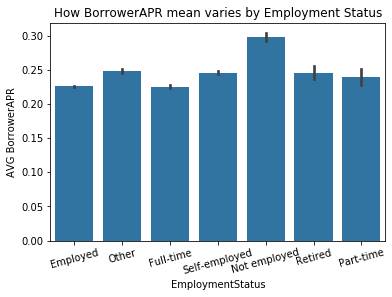

In [14]:
sns.barplot(data=loan_final, x='EmploymentStatus', y='BorrowerAPR', color=base_color)
plt.xticks(rotation=15)
plt.title('How BorrowerAPR mean varies by Employment Status')
plt.ylabel('AVG BorrowerAPR');

## The relation between `LoanOriginalAmount` and `BorrowerAPR`
> Small loan amounts have high Borrower APR in general. with medium negative relation

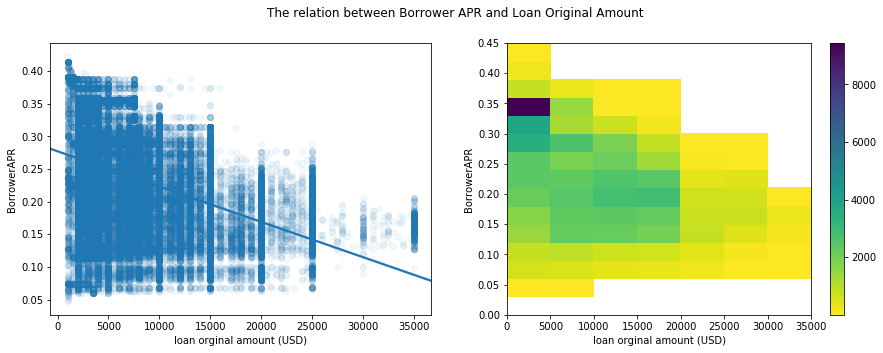

In [15]:
plt.figure(figsize=(15, 5))
plt.suptitle('The relation between Borrower APR and Loan Original Amount')
plt.subplot(1, 2, 1)
sns.regplot(data=loan_final, x='LoanOriginalAmount', y='BorrowerAPR', scatter_kws={'alpha': 1/20});
plt.xlabel('loan orginal amount (USD)');
plt.subplot(1, 2, 2)
heat_map(df=loan_final, x='LoanOriginalAmount', y='BorrowerAPR', x_inc=5000, y_inc=0.03, cmap='viridis_r', cmin=0.5, 
        color_bar = True)
plt.xlabel('loan orginal amount (USD)');

## How `BorrowerAPR` mean varies by `ProsperRating (Alpha)` And `ProsperScore` 
> There is strong relation between average APR and score and average APR and Rating. The higher the rating or score the lower the average APR

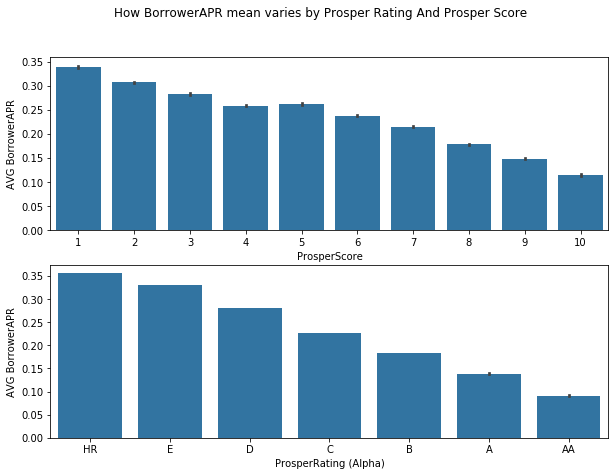

In [16]:
plt.figure(figsize=(10, 7))
plt.suptitle('How BorrowerAPR mean varies by Prosper Rating And Prosper Score')
plt.subplot(2, 1, 1)
sns.barplot(data=loan_final, x='ProsperScore', y='BorrowerAPR', color=base_color)
plt.ylabel('AVG BorrowerAPR');
plt.subplot(2, 1, 2)
sns.barplot(data=loan_final, x='ProsperRating (Alpha)', y='BorrowerAPR', color=base_color)
plt.ylabel('AVG BorrowerAPR');

## How the change in `ProsperRating (Alpha)` and `ProsperScore` infuence the `LoanOrignalAmount`
> The loan amount on average increases with the increase of rating or score

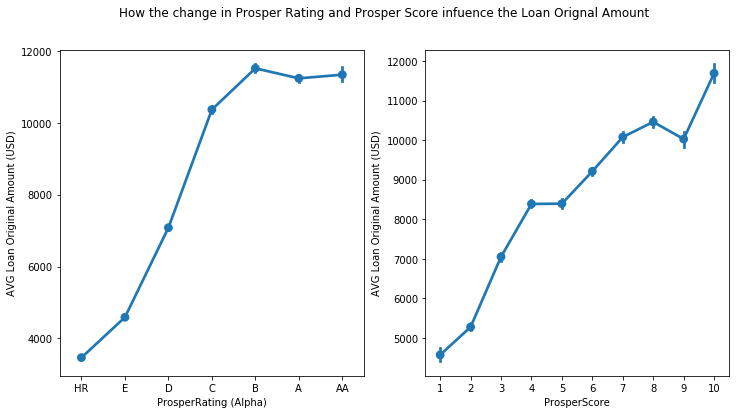

In [17]:
plt.figure(figsize=(12, 6))
plt.suptitle('How the change in Prosper Rating and Prosper Score infuence the Loan Orignal Amount')
plt.subplot(1, 2, 1)
sns.pointplot(data=loan_final, x='ProsperRating (Alpha)', y='LoanOriginalAmount')
plt.ylabel('AVG Loan Original Amount (USD)');
plt.subplot(1, 2, 2)
sns.pointplot(data=loan_final, x='ProsperScore', y='LoanOriginalAmount')
plt.ylabel('AVG Loan Original Amount (USD)');

## The effect of `ProsperRating (Alpha)` on the relation between `BorrowerAPR` and `LoanOriginalAmount`
1. The relation between the `BorrowerAPR` and `LoanOriginalAmount` remains negative for `ProsperRating (Alpha)` From `HR` to `B`
2.  The relation between the `BorrowerAPR` and `LoanOriginalAmount` goes from negative to positive for `ProsperRating (Alpha)` of `A` and `AA`

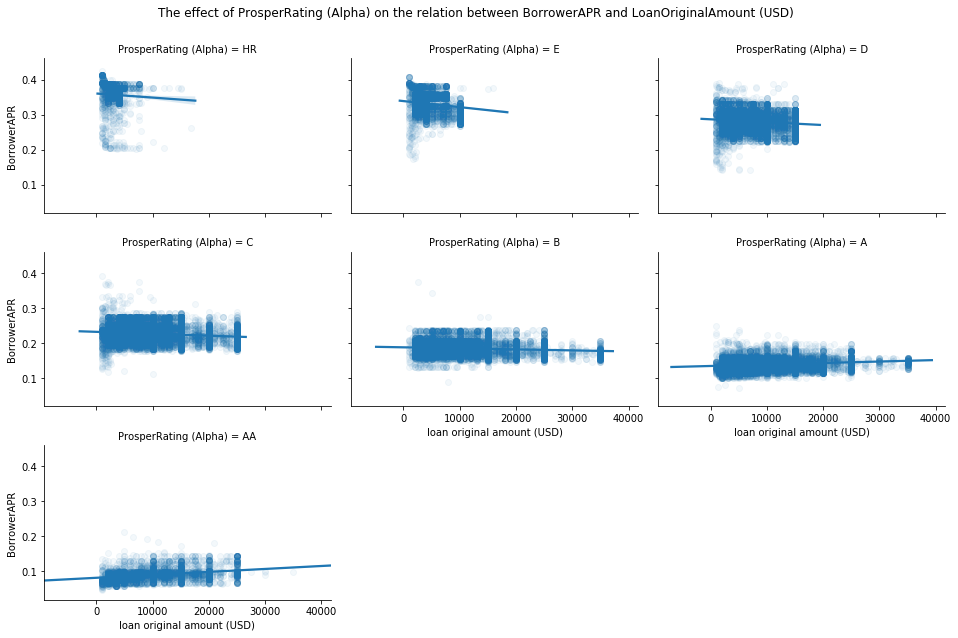

In [18]:
g = sns.FacetGrid(data=loan_final, col='ProsperRating (Alpha)', col_wrap=3, aspect=1.5)
g.map(sns.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.3, scatter_kws={'alpha': 1/20});
g.set_xlabels('loan original amount (USD)')
plt.suptitle('The effect of ProsperRating (Alpha) on the relation between BorrowerAPR and LoanOriginalAmount (USD)')
plt.subplots_adjust(top=0.90)


##  The effect of the `Term` variable on the relation between `BorrowerAPR` and `LoanOriginalAmount`
> The relation is still negative but the rate is different acorss the Term Categories as the relation is stronger for the three year and the five year terms than the one year term And this logical as usually the loan with higher Term have higher Amount

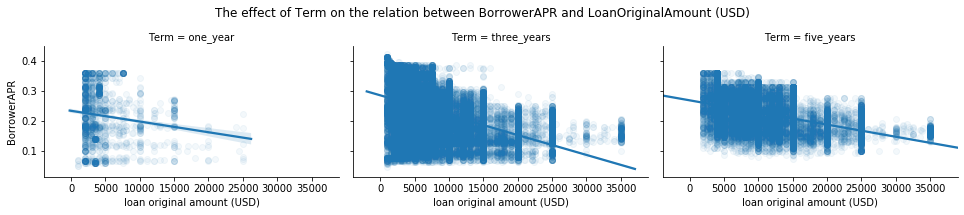

In [19]:
g = sns.FacetGrid(data=loan_final, col='Term', aspect=1.5)
g.map(sns.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.3, scatter_kws={'alpha': 1/20});
g.set_xlabels('loan original amount (USD)')
plt.suptitle('The effect of Term on the relation between BorrowerAPR and LoanOriginalAmount (USD)');
plt.subplots_adjust(top=0.80);

## How `BorrowerAPR` and `ProsperScore` vary by `Term`
1. the `BorrowerAPR` <strong> decrease </strong> with the increase in the `Term` for data points with rating from `HR` to `C`
2. the `BorrowerAPR` <strong>increase</strong> with the increase in the `Term` for data points with rating from `B` to `AA`

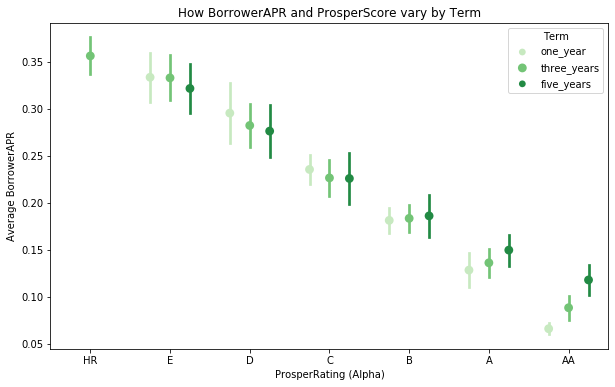

In [20]:
plt.figure(figsize=(10, 6))
sns.pointplot(data=loan_final, x='ProsperRating (Alpha)', y='BorrowerAPR', hue='Term',
              linestyles='', dodge=0.5, ci='sd', palette='Greens');
plt.title('How BorrowerAPR and ProsperScore vary by Term')
plt.ylabel('Average BorrowerAPR');

##  How `LoanOriginalAmount` and `ProsperScore` vary by `Term`
> For the one year term the score doesn't influence the Loan Amount but for the three and five years term the loan amount increases with higher higher score

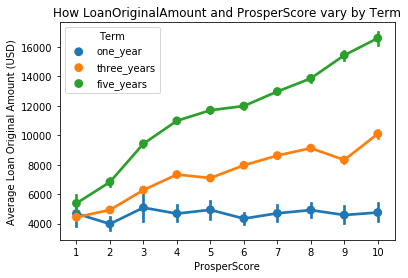

In [21]:
sns.pointplot(data=loan_final, x='ProsperScore', y='LoanOriginalAmount', hue='Term')
plt.title('How LoanOriginalAmount and ProsperScore vary by Term')
plt.ylabel('Average Loan Original Amount (USD)');


## Summary:
### During the early exploration of the variables I found that:
* The `BorrowerAPR` on average was increasing from 2009 to 2012 and was decreasing from 2012 to 2014 
* The `BorrowerAPR` is highly negatively correlated with `ProsperScore` And `ProsperRating (Alpha)`
* The `BorrowerAPR` is higher on average for the data points with `Not employed` EmploymentStatus
* The `BorrowerAPR` is negatively correlated with `LoanOriginalAmount`
* The `LoanOriginalAmount` on average increases with the increase of rating or score
> And these findings motivated the following part where I found the following:

<ul>
<li>By breaking the relaion between `BorrowerAPR` and `LoanOrignalAmount` by the `ProsperRating (Alpha)` we found two major observations:
    <oL>
        <li> The relation between the `BorrowerAPR` and `LoanOriginalAmount` remains negative for `ProsperRating (Alpha)` From `HR` to `B` that strengthen the initial observation
         <li>The relation between the `BorrowerAPR` and `LoanOriginalAmount` goes from negative to positive for `ProsperRating (Alpha)` of `A` and `AA` which disagree with the initial observation 
             
   </ol>
</li>
<li>By breaking the relaion between `BorrowerAPR` and `LoanOrignalAmount` be the<em>Term</em> It seems that the relation is still negative but the rate is different acorss the `Term` Categories as the relation is stronger for the three year and the five year terms than the one year term And this logical as usually the loan with higher Term have higher Amount. So this strengthen the initial observation

    
</ul>

<ul> 
    <li> By breaking the relaion between `BorrowerAPR` and `ProsperRating (Alpha)` by the <em>Term</em> we found three major observations:
    <ol>
     <li> The higher the Rating the lower The APR and that agrees with the initial observation but there is more to the story
     <li> the `BorrowerAPR` <strong> decrease </strong> with the increase in the `Term` for data points with rating from `HR` to `C`
     <li> the `BorrowerAPR` <strong>increase</strong> with the increase in the `Term` for data points with rating from `B` to `AA`

   </ol>
</li>
<li> By breaking the relaion between `ProsperScore` and `LoanOrignalAmount` by the `Term` It seems that for the one year term the score doesn't influence the Loan Amount but for the three and five years term the loan amount increases with higher higher score and this can be explained by the lack of data points with one year term
</ul>